In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Load Dataset

In [22]:
import pandas as pd

# Load the CSV files into DataFrames
X_train_df = pd.read_csv('input.csv', header=None)
Y_train_df = pd.read_csv('labels.csv', header=None)

X_test_df = pd.read_csv('input_test.csv', header=None)
Y_test_df = pd.read_csv('labels_test.csv', header=None)

# Inspect the first few rows to check for inconsistencies
print(X_train_df.head())
print(Y_train_df.head())
print(X_test_df.head())
print(Y_test_df.head())

# Check the shapes to ensure consistency
print(X_train_df.shape)
print(Y_train_df.shape)
print(X_test_df.shape)
print(Y_test_df.shape)


   0      1      2      3      4      5      6      7      8      9      ...  \
0   37.0   39.0   25.0   26.0   24.0    9.0   34.0   25.0   10.0   49.0  ...   
1  131.0  128.0  135.0  160.0  157.0  164.0  198.0  192.0  204.0  204.0  ...   
2   80.0   92.0   88.0   83.0   96.0   89.0   76.0   92.0   82.0   74.0  ...   
3  149.0  173.0  151.0  131.0  153.0  132.0  156.0  173.0  155.0  143.0  ...   
4  255.0  254.0  239.0  253.0  246.0  228.0  255.0  252.0  233.0  254.0  ...   

   29990  29991  29992  29993  29994  29995  29996  29997  29998  29999  
0   21.0   67.0   63.0   38.0   78.0   74.0   49.0   58.0   54.0   29.0  
1   65.0   63.0   91.0   69.0   62.0   87.0   65.0   71.0   96.0   74.0  
2   99.0  133.0  128.0  109.0  119.0  114.0   94.0  124.0  119.0   99.0  
3   57.0   48.0   48.0   58.0   51.0   51.0   61.0   56.0   56.0   66.0  
4  234.0  255.0  254.0  234.0  255.0  254.0  234.0  254.0  253.0  233.0  

[5 rows x 30000 columns]
   0
0  0
1  0
2  0
3  0
4  0
   0      1      2 

In [28]:
# Drop rows with missing values
X_train_df = X_train_df.dropna()
Y_train_df = Y_train_df.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0)
X_train_df = X_train_df.fillna(0)
Y_train_df = Y_train_df.fillna(0)


In [30]:
# Load only the first 30000 columns as an example
X_train_df = pd.read_csv('input.csv', usecols=range(30000), header=None)
X_test_df = pd.read_csv('input_test.csv', usecols=range(30000), header=None)


In [31]:
# Save cleaned data to new CSV files
X_train_df.to_csv('cleaned_input.csv', index=False, header=False)
Y_train_df.to_csv('cleaned_labels.csv', index=False, header=False)

X_test_df.to_csv('cleaned_input_test.csv', index=False, header=False)
Y_test_df.to_csv('cleaned_labels_test.csv', index=False, header=False)

# Reload cleaned data
X_train = np.loadtxt('cleaned_input.csv', delimiter=',')
Y_train = np.loadtxt('cleaned_labels.csv', delimiter=',')

X_test = np.loadtxt('cleaned_input_test.csv', delimiter=',')
Y_test = np.loadtxt('cleaned_labels_test.csv', delimiter=',')


In [34]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [36]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


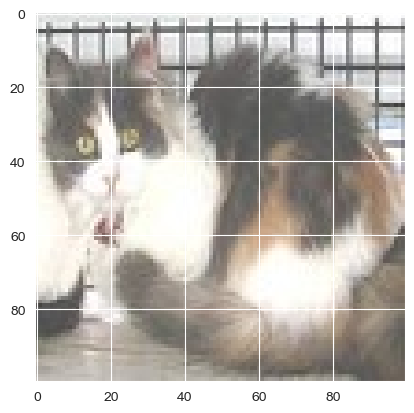

In [38]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Model

In [40]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [42]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [44]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.5184 - loss: 0.7086
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.5634 - loss: 0.6796
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6958 - loss: 0.6120
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.7549 - loss: 0.5409
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.7478 - loss: 0.5137


In [48]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7574 - loss: 0.5084


[0.6273890137672424, 0.6549999713897705]

Making predictions

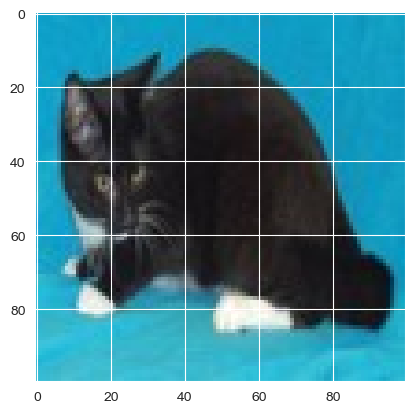

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Our model says it is a : cat


In [50]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)
